In [67]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [68]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [69]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [70]:
# Display the row's columns and data in dictionary format for measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd1a913a090>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [71]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#result = session.query(Measurement.tobs).filter(Measurement.date>= "2016-06-01 & Measurement.date<= "2016-06-30).all()
june_results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)== 6)
#print(results)

In [72]:
# 2. Convert the June temperatures to a list.
june_temp = results.all()
print(june_temp)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [73]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp,columns = ["date", "June Temps"])
june_temp_df.head(10)

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
5,2010-06-06,78.0
6,2010-06-07,77.0
7,2010-06-08,78.0
8,2010-06-09,78.0
9,2010-06-10,79.0


In [74]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [75]:
# 5. Return to your challenge instructions to compare your summary statistics
# Results match with the solution.

In [76]:
# This is some extra work...
#The histogram of the June temparature data
june_temp_df.set_index(june_temp_df['date'], inplace=True)
june_temp_df = june_temp_df.sort_index()
print(june_temp_df.to_string(index=False))

      date  June Temps
2010-06-01        78.0
2010-06-01        73.0
2010-06-01        77.0
2010-06-01        69.0
2010-06-01        76.0
2010-06-01        71.0
2010-06-01        74.0
2010-06-01        70.0
2010-06-01        74.0
2010-06-02        78.0
2010-06-02        70.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        71.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        72.0
2010-06-02        76.0
2010-06-03        74.0
2010-06-03        78.0
2010-06-03        73.0
2010-06-03        72.0
2010-06-03        77.0
2010-06-03        76.0
2010-06-03        75.0
2010-06-03        78.0
2010-06-03        67.0
2010-06-04        73.0
2010-06-04        75.0
2010-06-04        75.0
2010-06-04        76.0
2010-06-04        73.0
2010-06-04        68.0
2010-06-04        72.0
2010-06-04        70.0
2010-06-04        74.0
2010-06-05        73.0
2010-06-05        77.0
2010-06-05        78.0
2010-06-05        76.0
2010-06-05        72.0
2010-06-05        79.0
2010-06-05 

<AxesSubplot:xlabel='date'>

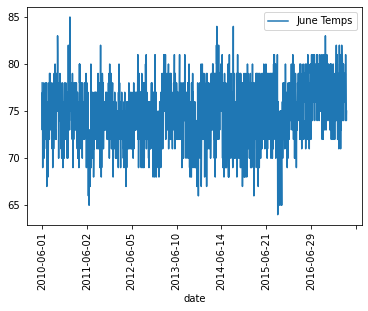

In [77]:
june_temp_df.plot(rot = 90)

## D2: Determine the Summary Statistics for December

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [79]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)== 12)

In [80]:
# 7. Convert the December temperatures to a list.
december_temp = december_results.all()

In [81]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp, columns = ["date", "December Temps"])
december_temp_df.head(10)

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
5,2010-12-08,67.0
6,2010-12-09,77.0
7,2010-12-10,66.0
8,2010-12-11,69.0
9,2010-12-12,68.0


In [82]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [83]:
# 10. Return to your challenge instructions to compare your summary statistics

In [84]:
# This is some extra work...
#The graph of the December temparature data
december_temp_df.set_index(december_temp_df['date'], inplace=True)
december_temp_df = december_temp_df.sort_index()
#december_temp_df.group_by("date").plot(rot = 90)
print(december_temp_df.to_string(index=False))

      date  December Temps
2010-12-01            76.0
2010-12-01            73.0
2010-12-01            72.0
2010-12-01            78.0
2010-12-01            72.0
2010-12-01            70.0
2010-12-01            71.0
2010-12-01            73.0
2010-12-02            71.0
2010-12-02            71.0
2010-12-02            73.0
2010-12-02            75.0
2010-12-02            74.0
2010-12-02            72.0
2010-12-02            74.0
2010-12-02            70.0
2010-12-03            67.0
2010-12-03            74.0
2010-12-03            70.0
2010-12-03            74.0
2010-12-03            71.0
2010-12-03            74.0
2010-12-03            72.0
2010-12-03            73.0
2010-12-04            75.0
2010-12-04            72.0
2010-12-04            77.0
2010-12-04            74.0
2010-12-04            74.0
2010-12-04            78.0
2010-12-04            74.0
2010-12-05            66.0
2010-12-05            69.0
2010-12-05            71.0
2010-12-05            78.0
2010-12-05            73.0
2

<AxesSubplot:xlabel='date'>

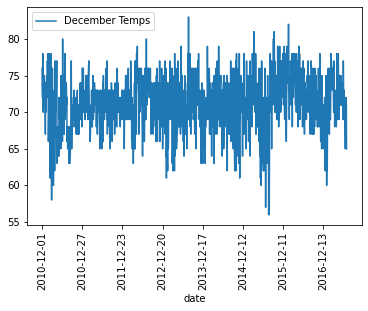

In [85]:
december_temp_df.plot(rot = 90)

In [88]:
# Additional queries (June) for the summary
june_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)== 6).all()

# Create a DataFrame from the list of Precipitation for the month of June. 
june_prcp_df = pd.DataFrame(june_prcp,columns = ["date", "June Precipitation"])
june_prcp_df.head(10)

,date,June Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
5,2010-06-06,0.00
6,2010-06-07,0.00
7,2010-06-08,0.00
8,2010-06-09,0.00
9,2010-06-10,0.00


In [89]:
# Calculate and print out the summary statistics for the June Precipitation DataFrame.
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [90]:
# Additional queries (June) for the summary
dec_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)== 12).all()

# Create a DataFrame from the list of Precipitation for the month of December. 
dec_prcp_df = pd.DataFrame(dec_prcp,columns = ["date", "December Precipitation"])
dec_prcp_df.head(10)

,date,December Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
5,2010-12-08,0.00
6,2010-12-09,0.00
7,2010-12-10,1.58
8,2010-12-11,0.77
9,2010-12-12,0.00


In [91]:
# Calculate and print out the summary statistics for the December Precipitation DataFrame.
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
